## 量化指标计算结果

In [1]:
from tkinter.ttk import Style
import seaborn as sns
import matplotlib.pyplot as plt 
from config import *
import json
import pandas as pd
import copy

p2r = {'a':'j','b':'i','c':'a','d':'b','e':'c','f':'h','g':'f','h':'g'}
r2p = {value:key for key,value in p2r.items()}
rbs = ['a','b','c','d','e','f','g','h']
RbsType = {'a':'type A', 'b':'type B', 'c':'type C', 'd':'type D',
            'e':'type E', 'f':'type F','g':'type G', 'h':'type H'}
rawfea_dict = {}
indicator_name = ['f_vol','f_connect','f_discon','f_cur','f_cost']
for num_bats in range(3,10):
    for rbs_name in rbs:
        path = './results/indicator_'+p2r[rbs_name]+'_'+str(num_bats)+'.csv'
        df_data = pd.read_csv(path)
        for fea in indicator_name:
            rawfea_dict[fea] =  rawfea_dict.get(fea,[]) + [df_data[fea].values[0]]
        rawfea_dict['rbs'] = rawfea_dict.get('rbs',[])+[RbsType[rbs_name]]
        rawfea_dict['num_bats'] = rawfea_dict.get('num_bats',[])+[num_bats]
pd.set_option("display.float_format", "{:.17f}".format)
df_rawfea = pd.DataFrame(rawfea_dict)


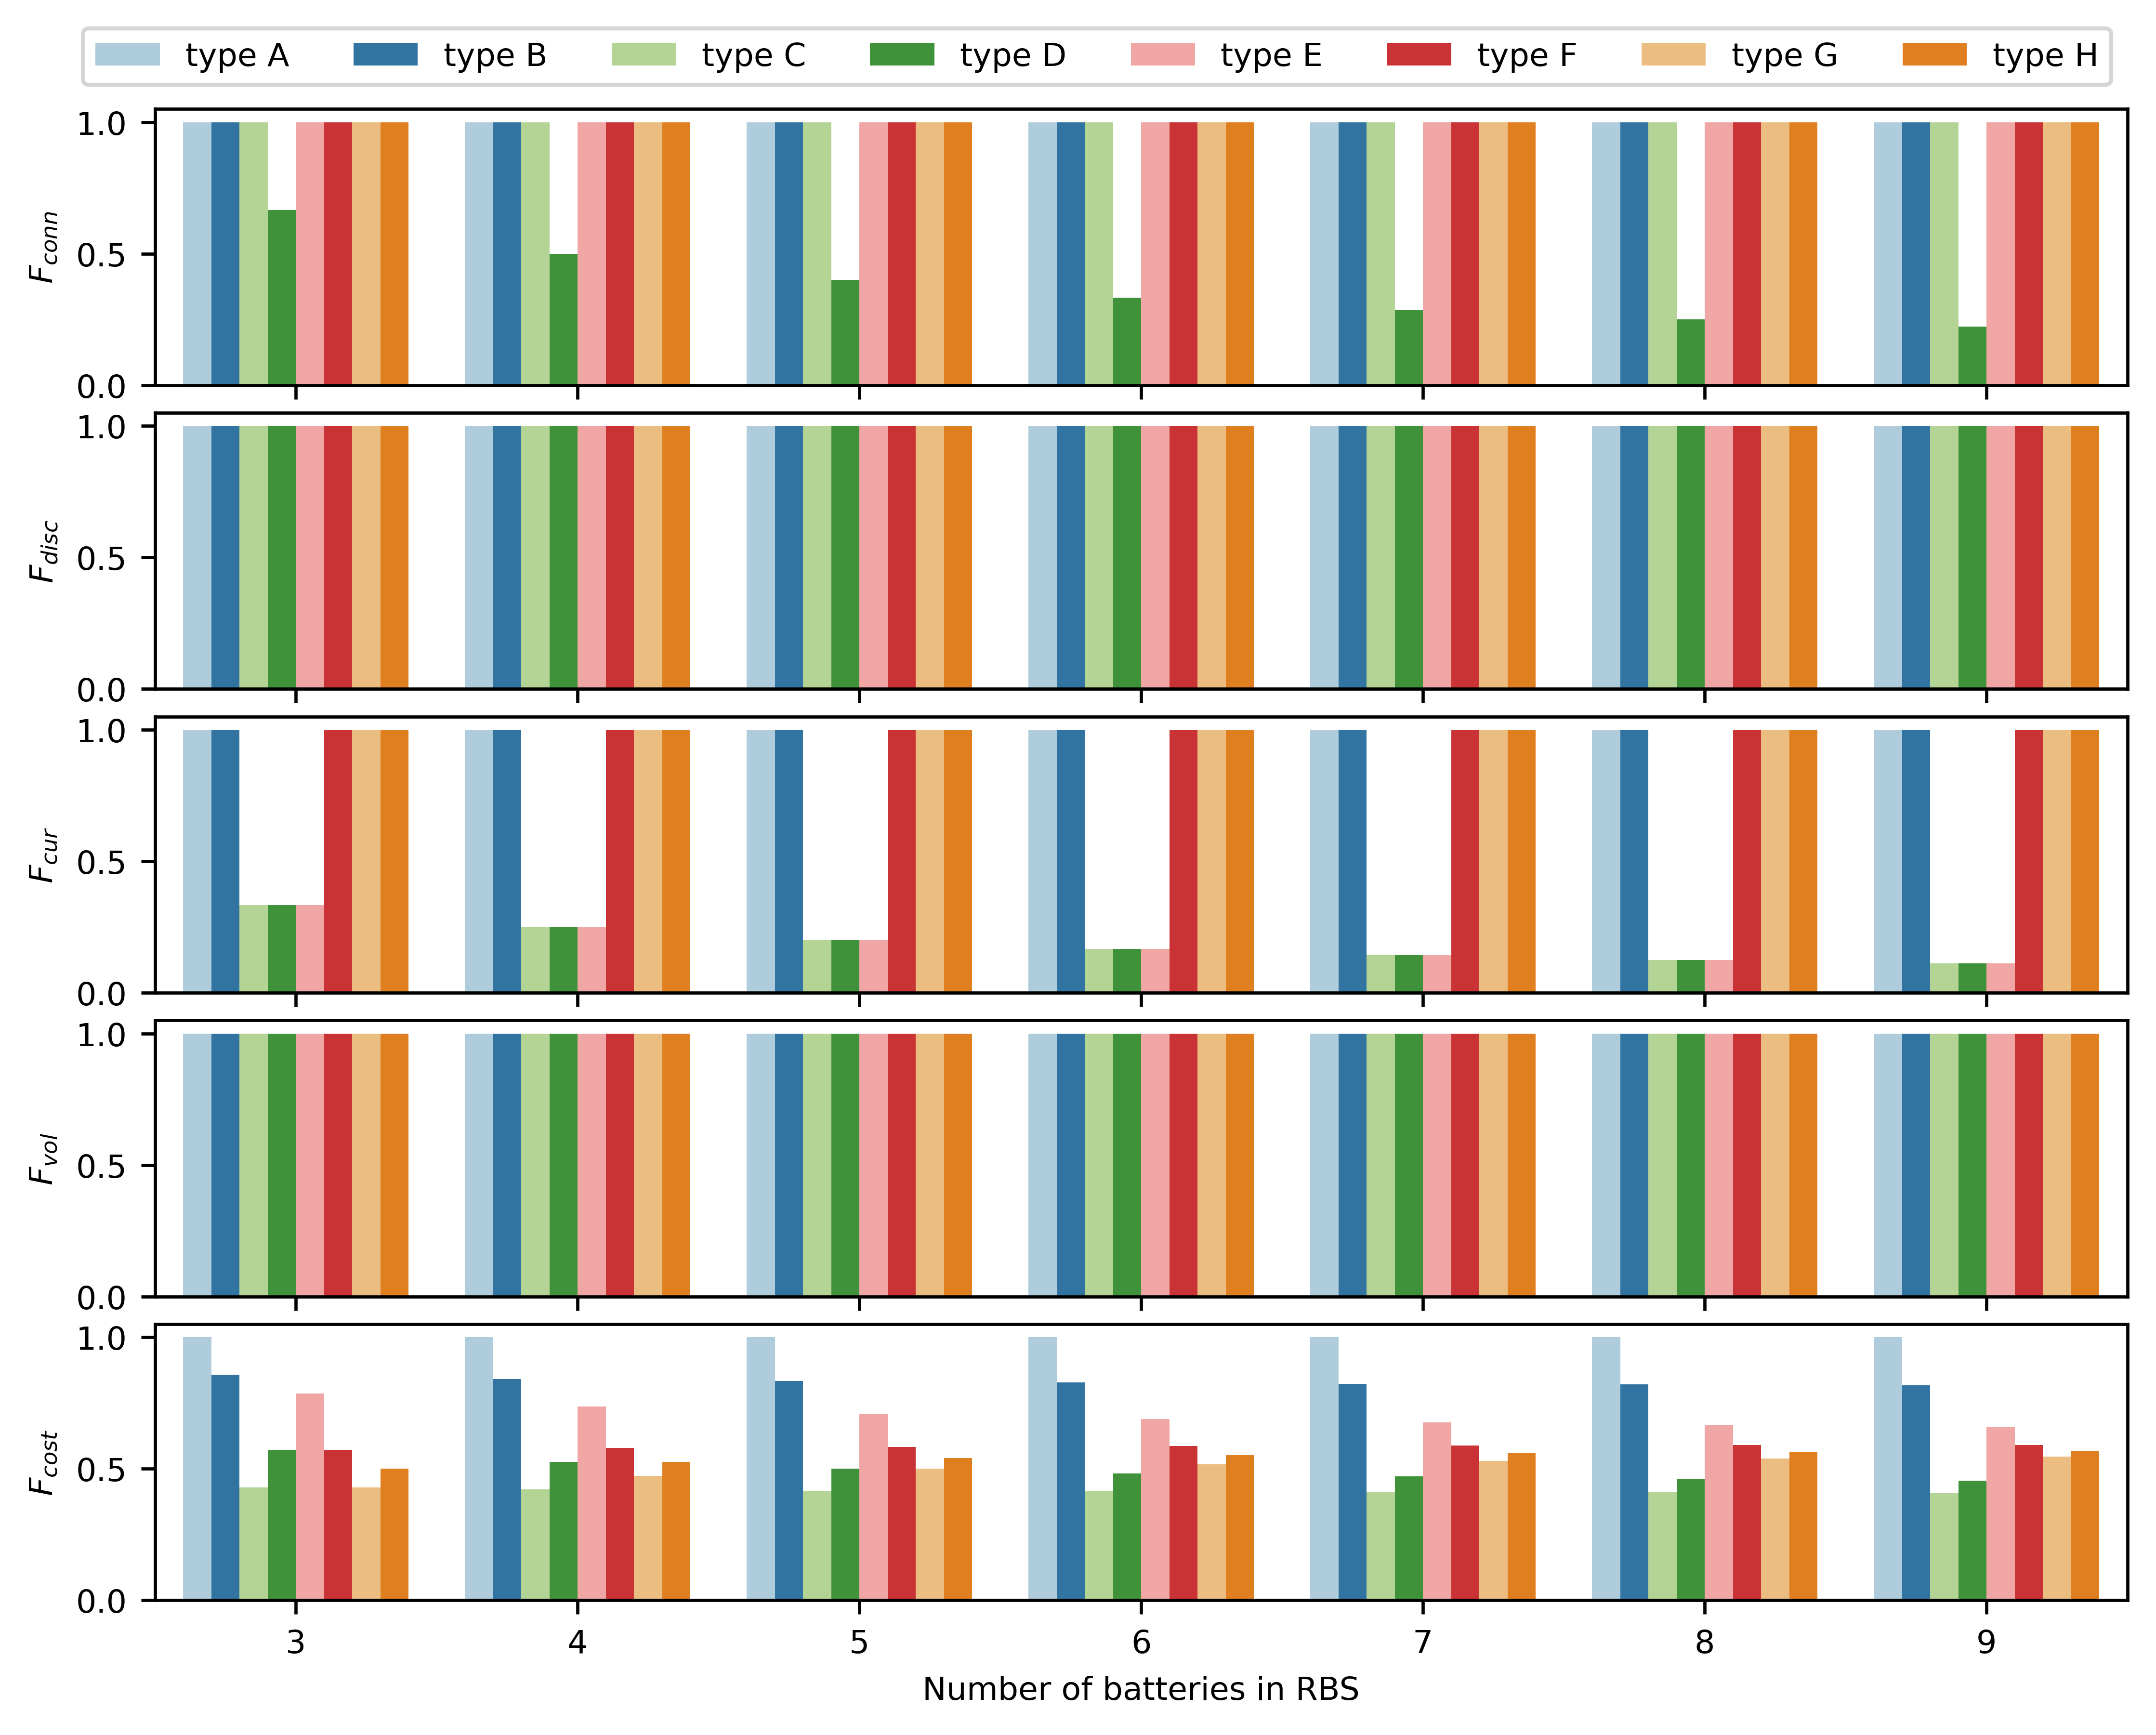

In [4]:
plt.style.use(['ieee'])
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00']
palet = sns.color_palette(color_list)

feas4ax = ["f_connect", "f_discon",  "f_cur","f_vol", "f_cost"]
ylabels = ["$F_{conn}$","$F_{disc}$","$F_{cur}$","$F_{vol}$","$F_{cost}$"]
fig,ax = plt.subplots(len(feas4ax),figsize=(7.5,6),sharex=True)
for i in range(len(feas4ax)):
    bar = sns.barplot(x='num_bats',y=feas4ax[i],hue='rbs',data=df_rawfea,ax=ax[i],palette=palet )

titles = ['(a)','(b)','(c)','(d)','(e)','(f)']
for i in range(len(feas4ax)):
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_xlabel('')
    # ax[i].set_yticks(np.arange(0,1.2,0.2))
    ax[i].legend_.remove()
ax[0].legend(loc='upper right',bbox_to_anchor=(1,1.35),ncol=9)
ax[4].set_xlabel('Number of batteries in RBS')

plt.subplots_adjust(left=0.08, right=0.99, top=0.94, bottom=0.08,hspace=0.1)
plt.savefig('./figs/eva_rbs.jpg',dpi=300)
plt.show()

## 适应度计算结果

In [7]:
from tkinter.ttk import Style
import seaborn as sns
import matplotlib.pyplot as plt 
from config import *
import json
import pandas as pd
import copy

Weights = [weights1,weights2,weights3]
feas = ['f_vol','f_connect','f_discon','f_cur','f_cost']

for i in range(len(Weights)):
    df_rawfea[Weights[i]['name']] = sum([df_rawfea[fea].values*Weights[i][fea] for fea in feas])
df_rawfea.to_csv('./results/features_of_classical_RBS.csv')

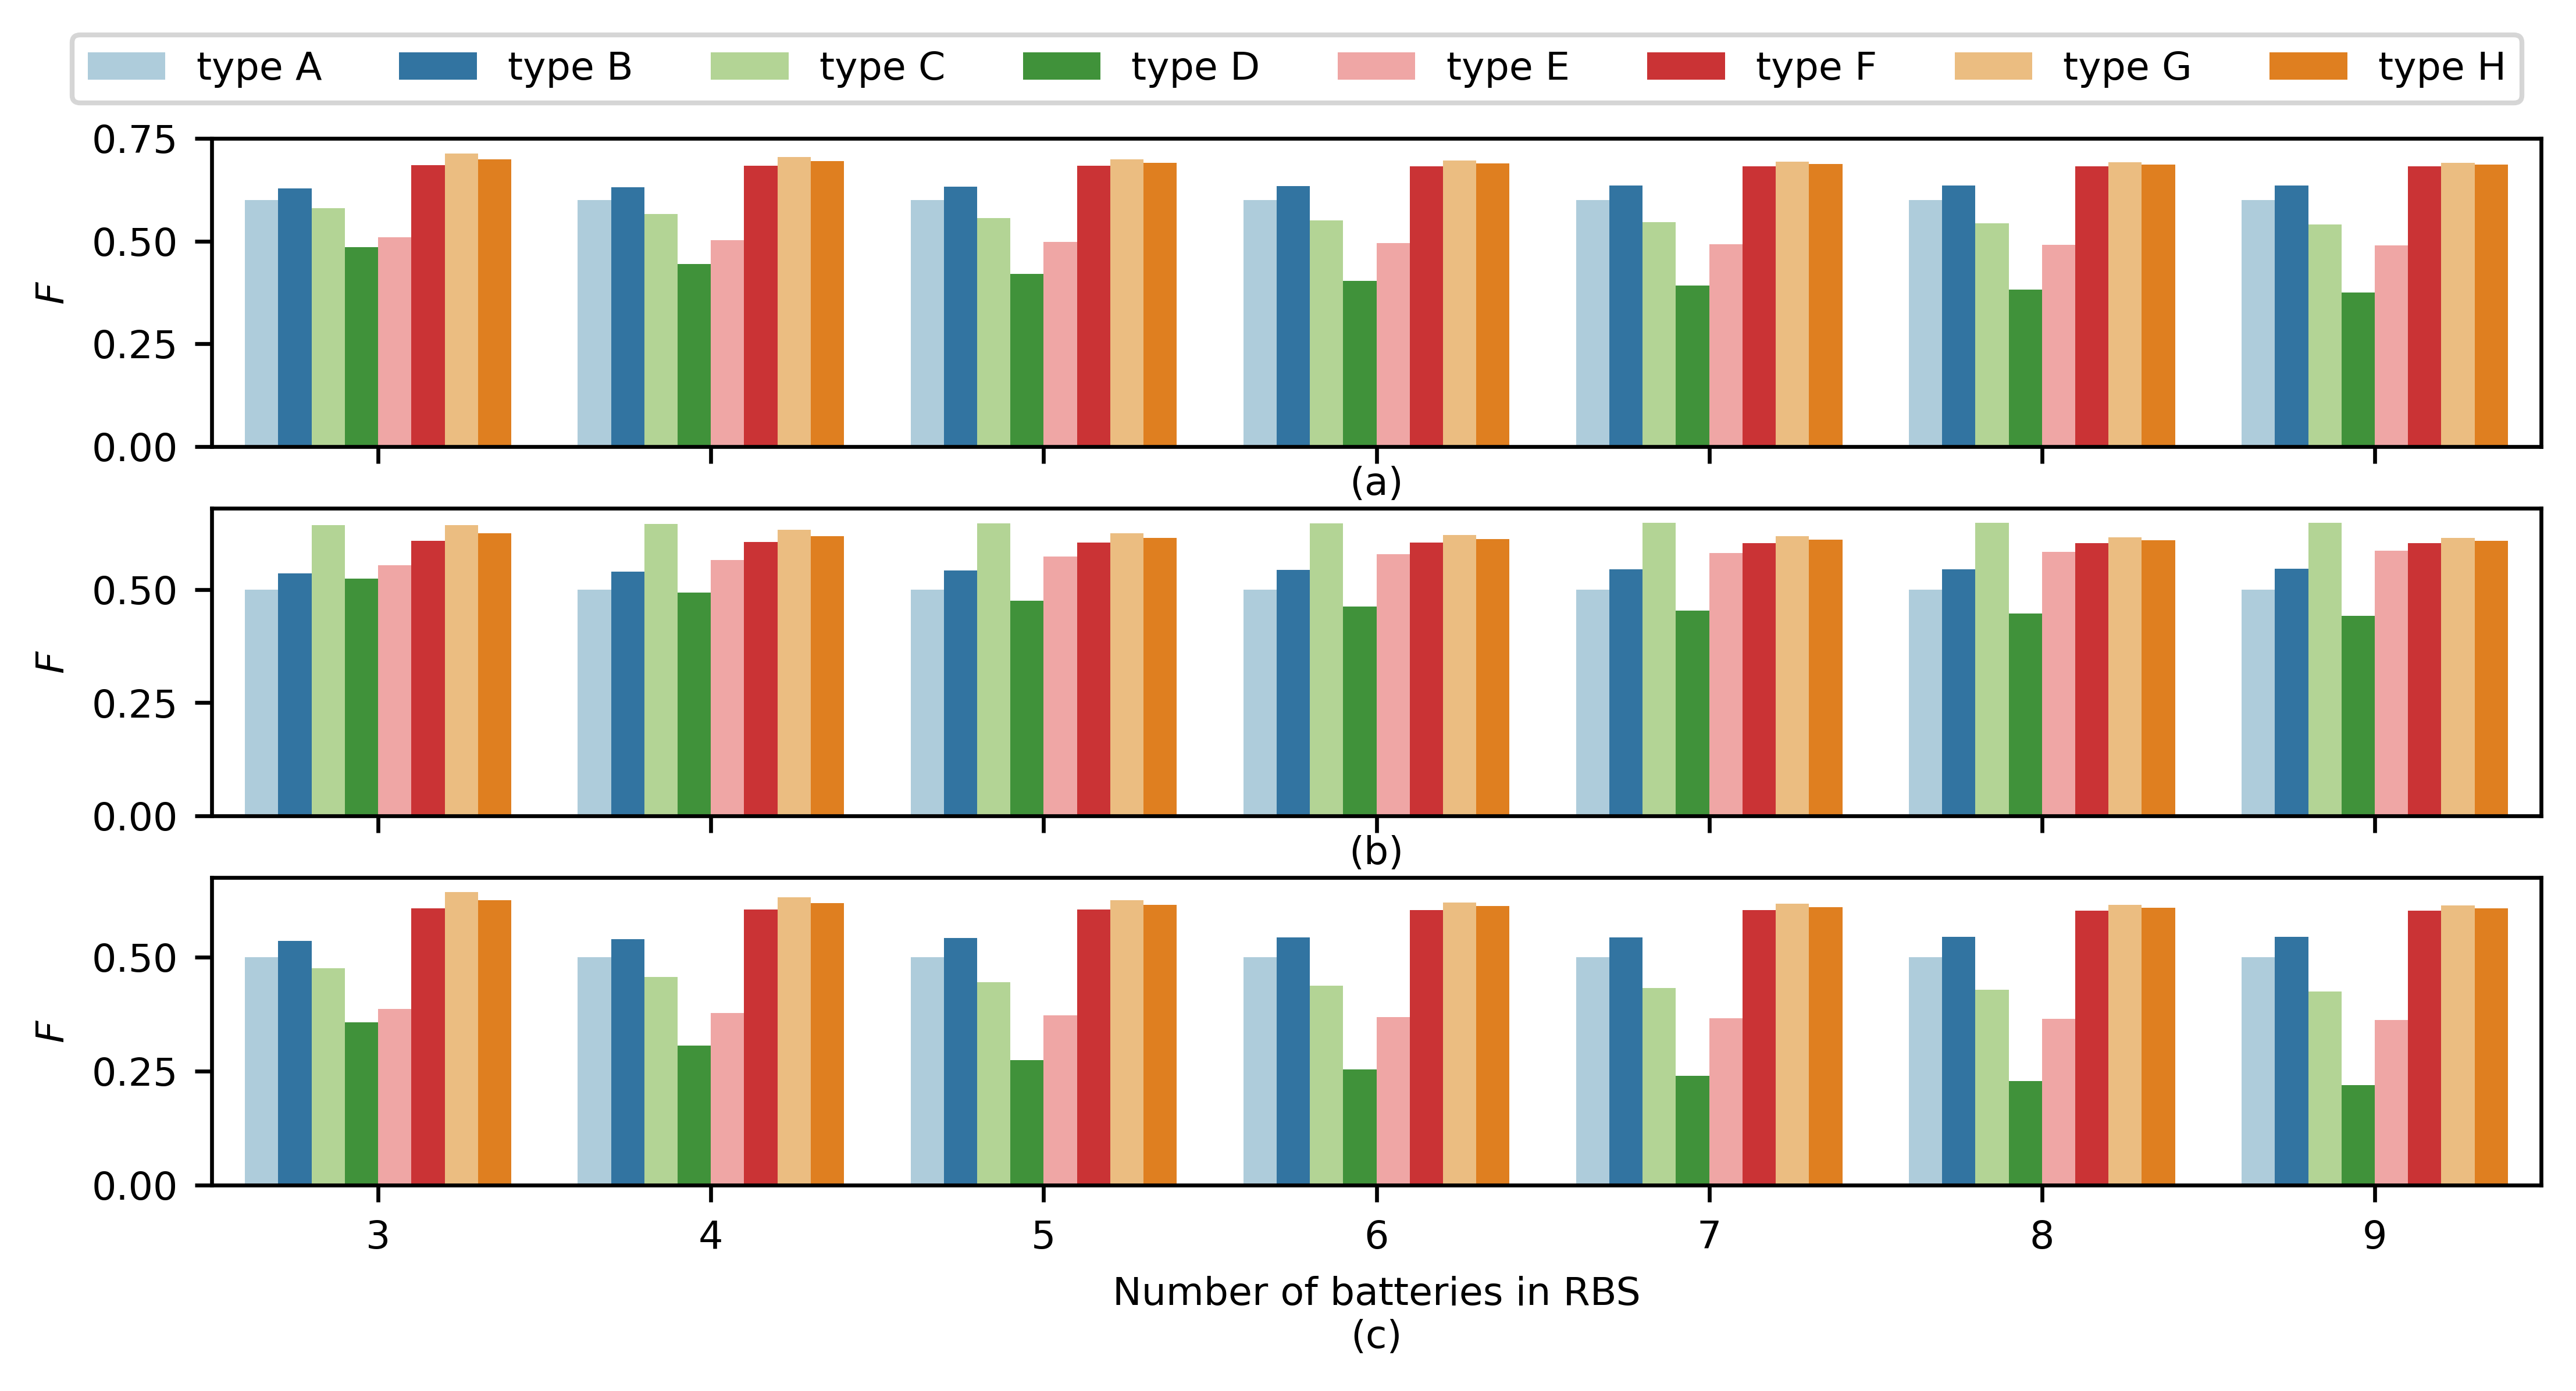

In [8]:
plt.style.use(['ieee'])
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00']
palet = sns.color_palette(color_list)

fig,ax = plt.subplots(3,1,figsize=(7.5,4),sharex=True)
for i in range(len(Weights)):
    bar = sns.barplot(x='num_bats',y=Weights[i]['name'],hue='rbs',data=df_rawfea,ax=ax[i],palette=palet )#,palette=palet
   
titles = ['(a)','(b)','(c)','(d)','(e)','(f)']
ylabels = ['$F$','$F$','$F$','$F$','$F$','$F$']
for i in range(3):
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_xlabel(titles[i])
    ax[i].legend_.remove()
ax[0].legend(loc='upper right',bbox_to_anchor=(1,1.4),ncol=9)
ax[2].set_xlabel('Number of batteries in RBS\n(c)')

plt.subplots_adjust(left=0.1, right=0.99, top=0.9, bottom=0.15,wspace=0.1)
plt.savefig('./figs/eva_fits.jpg',dpi=300)
plt.show()

## 综合大图

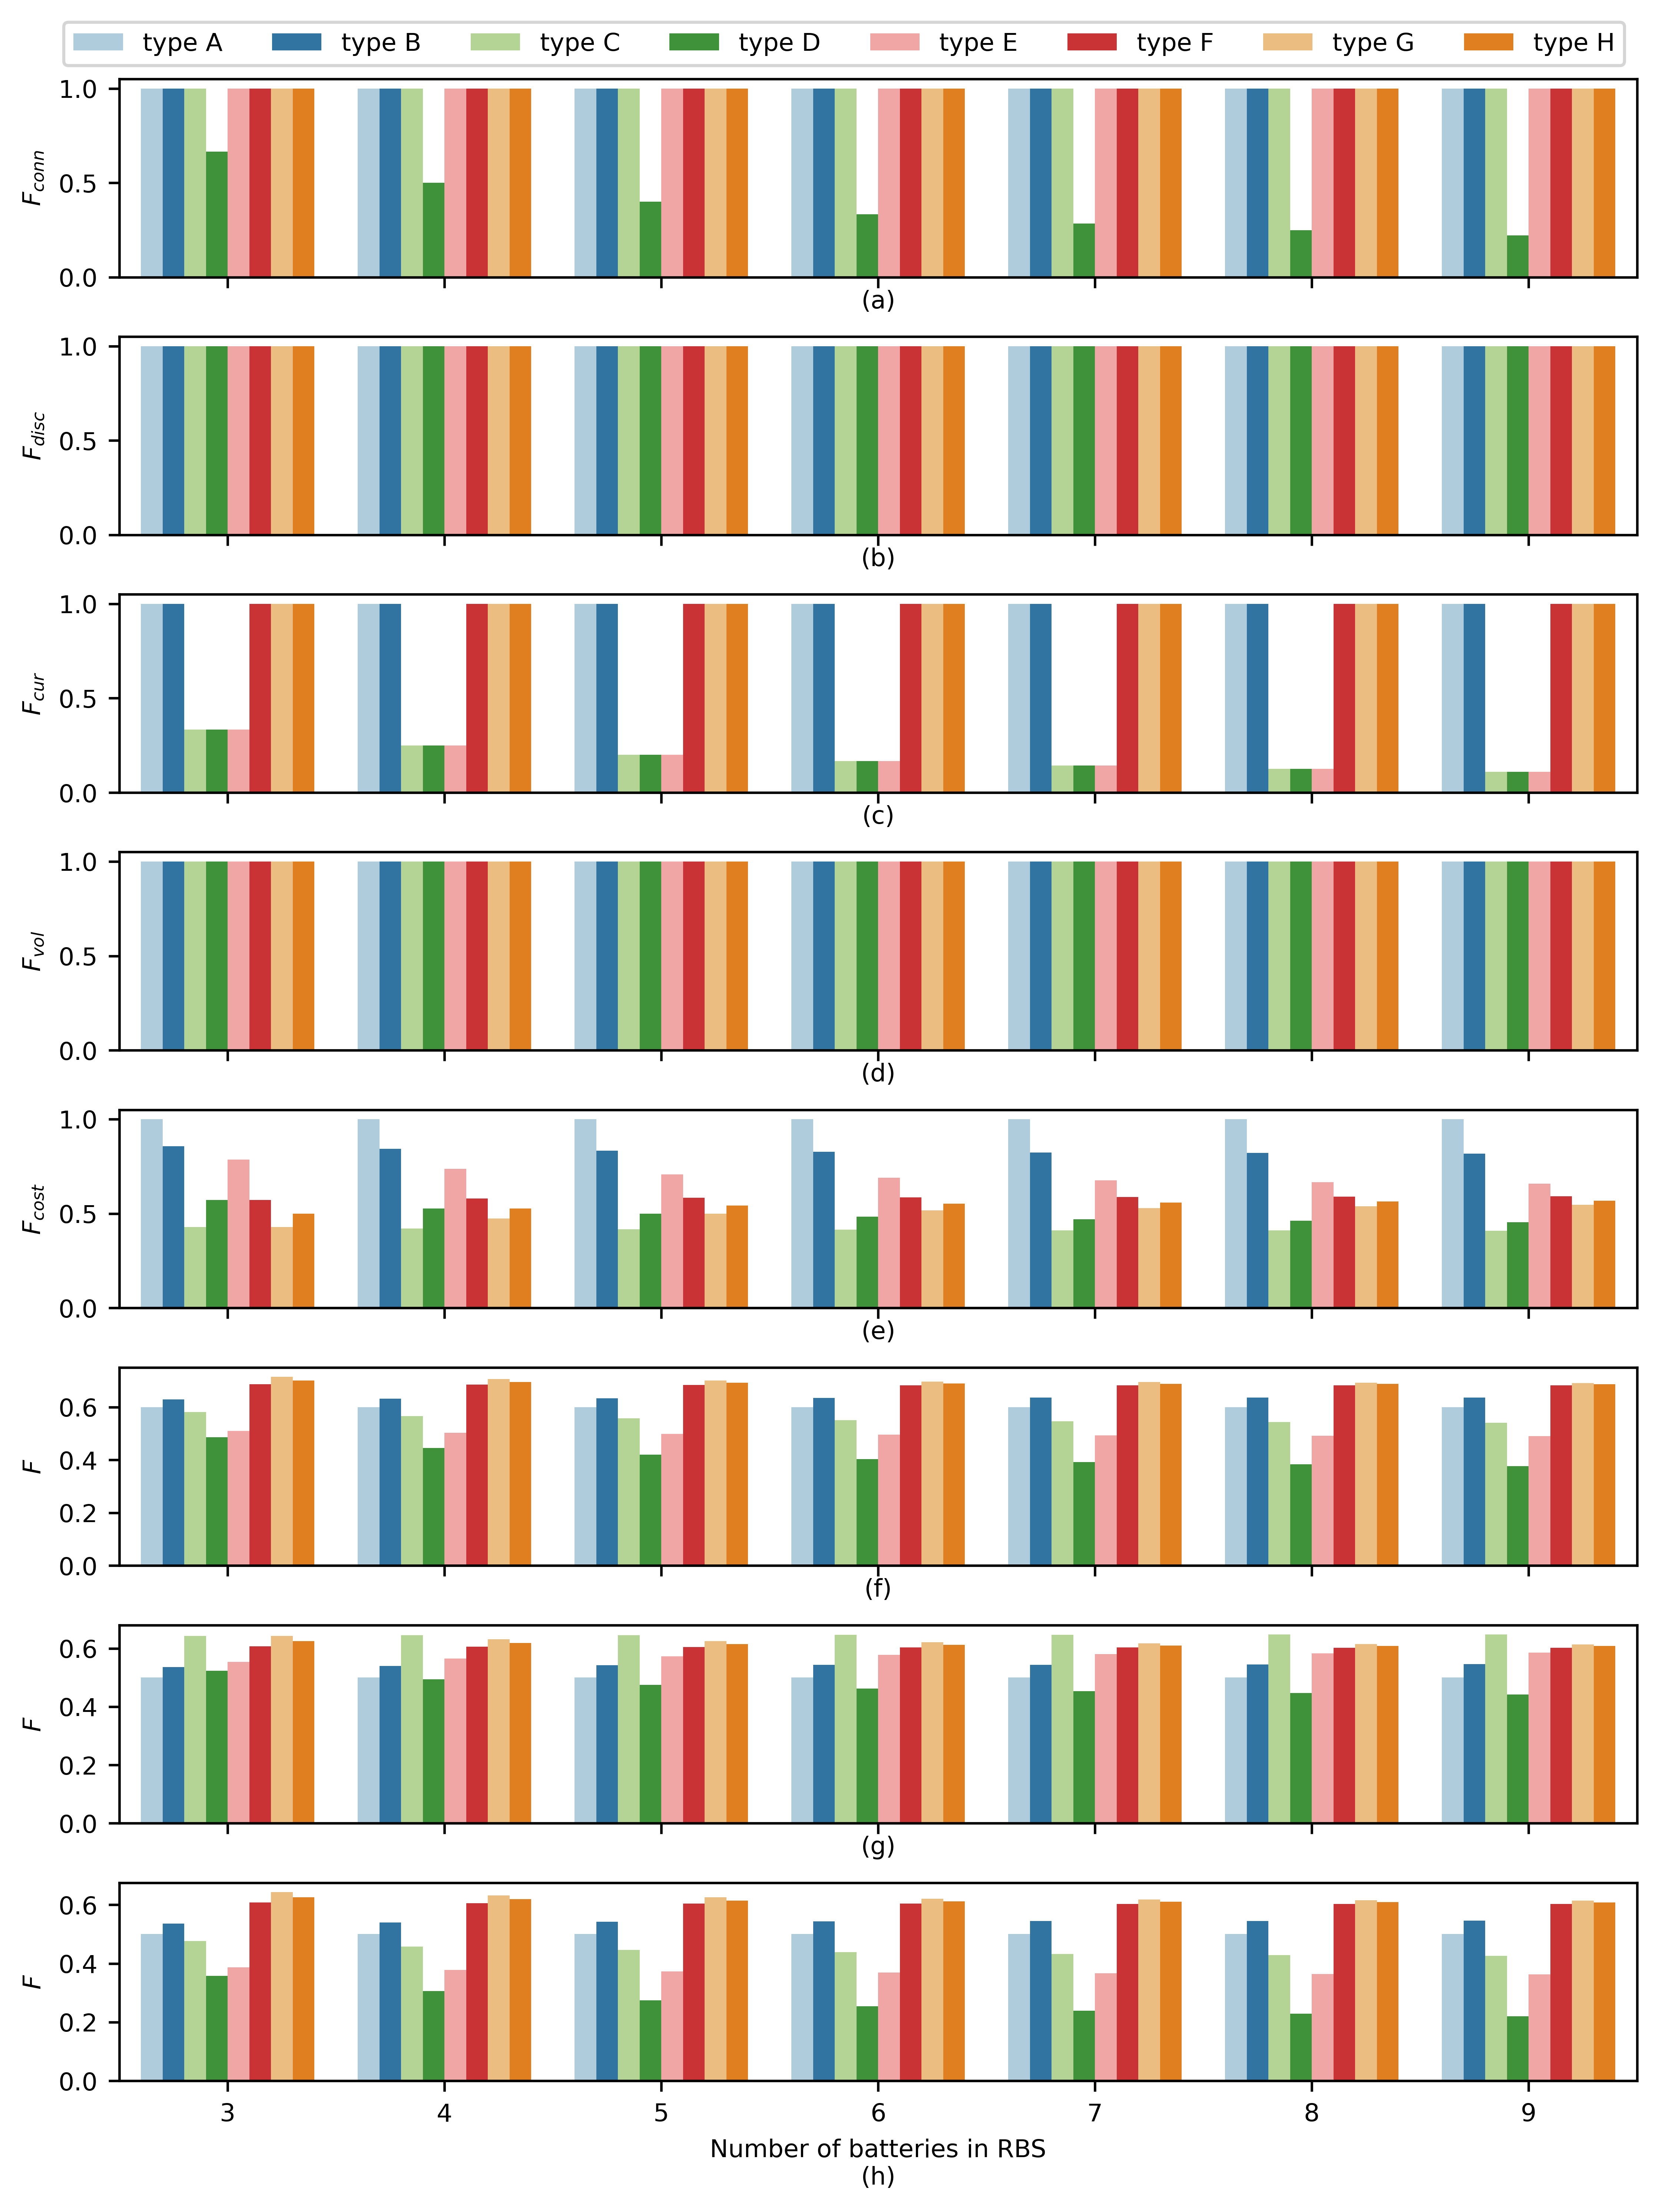

In [19]:
plt.style.use(['ieee'])
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00']
palet = sns.color_palette(color_list)

feas4ax = ["f_connect", "f_discon",  "f_cur","f_vol", "f_cost"]
ylabels = ["$F_{conn}$","$F_{disc}$","$F_{cur}$","$F_{vol}$","$F_{cost}$"]
fig,ax = plt.subplots(len(feas4ax)+3,figsize=(7.5,10),sharex=True)
for i in range(len(feas4ax)):
    bar = sns.barplot(x='num_bats',y=feas4ax[i],hue='rbs',data=df_rawfea,ax=ax[i],palette=palet )

titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
for i in range(len(feas4ax)):
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_xlabel(titles[i])
    # ax[i].set_yticks(np.arange(0,1.2,0.2))
    ax[i].legend_.remove()
ax[0].legend(loc='upper right',bbox_to_anchor=(1,1.35),ncol=9)
# ax[4].set_xlabel('Number of batteries in RBS\n(a)')

for i in range(len(Weights)):
    bar = sns.barplot(x='num_bats',y=Weights[i]['name'],hue='rbs',data=df_rawfea,ax=ax[i+5],palette=palet )#,palette=palet
   
ylabels = ['$F$','$F$','$F$','$F$','$F$','$F$']
for i in range(3):
    ax[i+5].set_ylabel(ylabels[i])
    ax[i+5].set_xlabel(titles[i+5])
    ax[i+5].legend_.remove()
# ax[0].legend(loc='upper right',bbox_to_anchor=(1,1.4),ncol=9)
ax[2+5].set_xlabel('Number of batteries in RBS\n(h)')

plt.subplots_adjust(left=0.08, right=0.99, top=0.95, bottom=0.05,hspace=0.3)
plt.savefig('./figs/eva_fits_all.jpg',dpi=300)
plt.show()

